# Code for saving images as numpy arrays

### Import Libraries

In [1]:
import os
import cv2
import numpy as np

### Make numpy arrays and save

#### 1.Initialize variables

In [8]:
path='./ExtendedYaleB'
filelist=os.listdir(path)
labels=[]
images=[]
count=0

#### 2.Load images and labels into arrays

In [9]:
for files in filelist:
    secondlist=os.listdir(path+'/'+files)
    for files2 in secondlist:
        labels.append(count)
        images.append(cv2.imread(path+'/'+files+'/'+files2))
    count=count+1
    print(str(count)+' loaded')

1 loaded
2 loaded
3 loaded
4 loaded
5 loaded
6 loaded
7 loaded
8 loaded
9 loaded
10 loaded
11 loaded
12 loaded
13 loaded
14 loaded
15 loaded
16 loaded
17 loaded
18 loaded
19 loaded
20 loaded
21 loaded
22 loaded
23 loaded
24 loaded
25 loaded
26 loaded
27 loaded
28 loaded


In [10]:
print("Total number of images" , len(images))
print("Total number of labels" , len(labels))

Total number of images 16380
Total number of labels 16380


#### 3.Reshape images

In [11]:

newimages=[]
height=32
width=32
for img in images:
    newimages.append(cv2.resize(img, (height,width), interpolation=cv2.INTER_CUBIC))


#### 4.Save numpy arrays

In [12]:
npimages=np.array(newimages)
nplabels=np.array(labels)
np.save('extendeedimages',npimages)
np.save('extendedlabels',nplabels)

# Code for creating, training and testing model

### 0.Import Libraries

In [42]:
import cv2
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt

### 1.Read the data

In [43]:
def readData():
    print("Loading data ...")
    #LOAD DATA AND LABELS
    Cells=np.load("extendeedimages.npy")
    labels=np.load("extendedlabels.npy")
    print("Data Loaded !")

    print("Preprocessing data ...")

    #SELECTING A 0 TO N-1 SEQUENCE IN THIS CASE {0,1,2,...,n - 1} where n is size of dataset
    s = np.arange(Cells.shape[0])
    #GETTING RANDOM ORDERING OF DATASET
    np.random.seed(28)
    np.random.shuffle(s)
    
    Cells=Cells[s]
    labels=labels[s]
    #LENGTH OF DATA
    len_data=len(Cells)

    #FINALISING TRAINING AND TEST SETS
    (X_train , X_test) = Cells[(int)(0.2*len_data):] , Cells[:(int)(0.2*len_data)]
    X_train = X_train.astype('float32')/255 
    X_test = X_test.astype('float32')/255

    train_len = len(X_train)
    test_len = len(X_test)

    
    (y_train,y_test) = labels[(int)(0.2*len_data):] , labels[:(int)(0.2*len_data)]

    print("DONE!")

    print("TRAINING LENGTH IS ",train_len)
    print("TEST LENGTH IS ", test_len)
    
    return (X_train,y_train),(X_test,y_test)



In [44]:
(train_images,train_labels),(test_images,test_labels) = readData()

Loading data ...
Data Loaded !
Preprocessing data ...
DONE!
TRAINING LENGTH IS  13104
TEST LENGTH IS  3276


### 2.Display subset of dataset

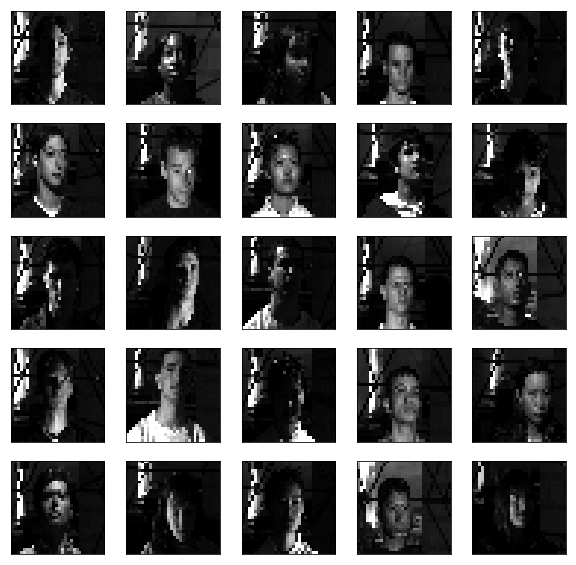

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap= plt.cm.binary)
plt.show()

### 3.Create model

In [46]:
model = keras.Sequential()

### 4.Add layers to model

In [47]:
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(28, activation='softmax'))

### 5.Compile the model

In [48]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### 6.Train the model on training data

In [49]:
history = model.fit(train_images, train_labels, validation_split = 0.2 ,epochs = 5)

Train on 10483 samples, validate on 2621 samples
Epoch 1/5
10483/10483 [==============================] - 65s 6ms/sample - loss: 0.6820 - acc: 0.7941 - val_loss: 0.0677 - val_acc: 0.9794
Epoch 2/5
10483/10483 [==============================] - 62s 6ms/sample - loss: 0.0467 - acc: 0.9865 - val_loss: 0.0413 - val_acc: 0.9844
Epoch 3/5
10483/10483 [==============================] - 61s 6ms/sample - loss: 0.0210 - acc: 0.9930 - val_loss: 0.0160 - val_acc: 0.9947
Epoch 4/5
10483/10483 [==============================] - 61s 6ms/sample - loss: 0.0157 - acc: 0.9953 - val_loss: 0.0046 - val_acc: 0.9992
Epoch 5/5
10483/10483 [==============================] - 62s 6ms/sample - loss: 0.0120 - acc: 0.9963 - val_loss: 0.0079 - val_acc: 0.9966


### 7. Evaluate the fittness on testing data

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

3276/3276 [==============================] - 8s 2ms/sample - loss: 0.0068 - acc: 0.9985


### 8. Plot the accuracy graph

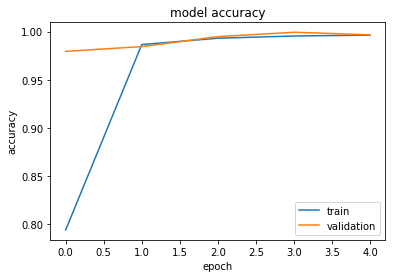

In [51]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

### 9.Plot the loss graph

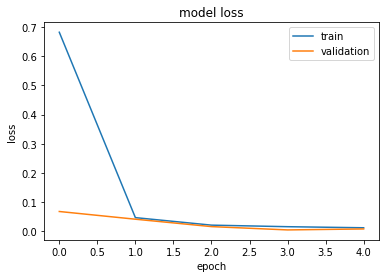

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()